## Probability Mass Function (PMF), Probability Density Function (PDF) & Cumulative Distribution Function (CDF)

A **probability mass function** gives us the frequency function which gives us the probability for a discrete random variable. When it is said *random variables* from an experiment like rolling a dice, choosing the number of hats, or getting a high score in a test. The discrete part of this means, that there is a set of numbers of outcomes.  
A **probability density function** a statistical expression that defines the probability distribution for continuous random variables as opposed to a discrete random variable.  
The **cumulative distribution function** of a random variable is another method to describe the distribution of random variables. The advantage of the cumulative distribution function is that it can be defined for any kind of random variable that is discrete, continuous or even mixed. Cumulative distribution function gives you a cumulative probability associated with the function. It is a similar concept to a cumulative frequency table.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
m = np.random.randint(2, 10, 40)
m

array([5, 9, 3, 2, 5, 8, 9, 5, 9, 8, 8, 7, 2, 2, 9, 5, 6, 4, 7, 9, 3, 3,
       3, 4, 4, 2, 5, 8, 9, 2, 6, 5, 4, 3, 4, 8, 4, 4, 6, 8])

In [29]:
df = pd.DataFrame(m)
df = pd.DataFrame(df[0].value_counts())
df

,0
4,7
9,6
8,6
5,6
3,5
2,5
6,3
7,2


In [30]:
length = len(m)
m

array([5, 9, 3, 2, 5, 8, 9, 5, 9, 8, 8, 7, 2, 2, 9, 5, 6, 4, 7, 9, 3, 3,
       3, 4, 4, 2, 5, 8, 9, 2, 6, 5, 4, 3, 4, 8, 4, 4, 6, 8])

In [31]:
data = pd.DataFrame(df[0])
data.columns = ['Counts']
data

,Counts
4,7
9,6
8,6
5,6
3,5
2,5
6,3
7,2


In [32]:
data['Prob'] = data['Counts']/length
data

,Counts,Prob
4,7,0.175
9,6,0.150
8,6,0.150
5,6,0.150
3,5,0.125
2,5,0.125
6,3,0.075
7,2,0.050


<BarContainer object of 8 artists>

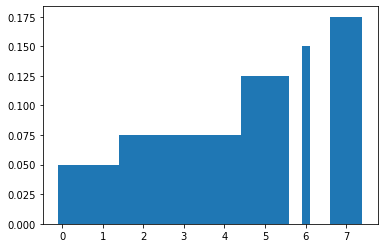

In [33]:
plt.bar(data['Counts'], data['Prob'])

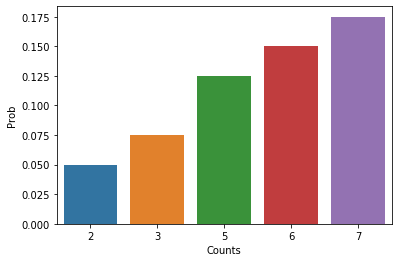

In [34]:
import seaborn as sns
sns.barplot(data['Counts'], data['Prob'])

In [35]:
data = {'Candy': ['Blue', 'Orange', 'Green', 'Purple'],
       'Total': [30000, 18000, 20000, 12000]}
df = pd.DataFrame(data)
df

,Candy,Total
0,Blue,30000
1,Orange,18000
2,Green,20000
3,Purple,12000


In [36]:
df['pmf'] = df['Total'] / df['Total'].sum()
df

,Candy,Total,pmf
0,Blue,30000,0.375
1,Orange,18000,0.225
2,Green,20000,0.250
3,Purple,12000,0.150


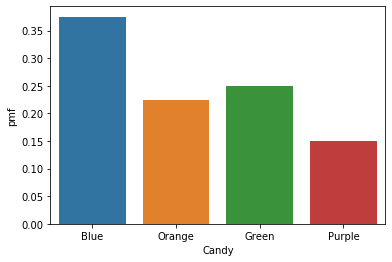

In [37]:
sns.barplot(df['Candy'], df['pmf'])

### Probability Density Function

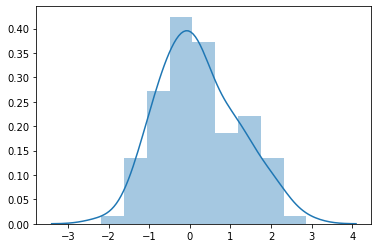

In [38]:
data = np.random.normal(size=100)
data = np.append(data, [1.2, 1.2, 1.2, 1.2, 1.2])
sns.distplot(data)

In [39]:
import scipy.stats as stats
mu=20 # mean
sigma = 2 # standard deviation
h = sorted(np.random.normal(mu, sigma, 100))

(array([0.051817  , 0.0414536 , 0.09327061, 0.11399741, 0.17617781,
        0.14508761, 0.19690461, 0.09327061, 0.08290721, 0.0414536 ]),
 array([15.54663728, 16.51157151, 17.47650573, 18.44143996, 19.40637418,
        20.3713084 , 21.33624263, 22.30117685, 23.26611108, 24.2310453 ,
        25.19597952]),
 <a list of 10 Patch objects>)

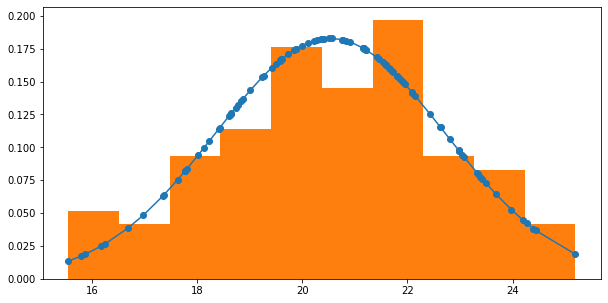

In [40]:
plt.figure(figsize=(10,5))
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
plt.plot(h, fit, '-o')
plt.hist(h, density=True)

### Cumulative Distribution Function

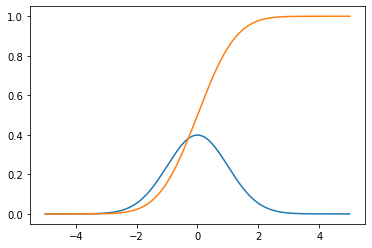

In [41]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
y_pdf = stats.norm.pdf(x, mu, sigma) # normal pdf
y_cdf = stats.norm.cdf(x, mu, sigma) # normal cdf
plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')

(array([0.051817  , 0.0414536 , 0.09327061, 0.11399741, 0.17617781,
        0.14508761, 0.19690461, 0.09327061, 0.08290721, 0.0414536 ]),
 array([15.54663728, 16.51157151, 17.47650573, 18.44143996, 19.40637418,
        20.3713084 , 21.33624263, 22.30117685, 23.26611108, 24.2310453 ,
        25.19597952]),
 <a list of 10 Patch objects>)

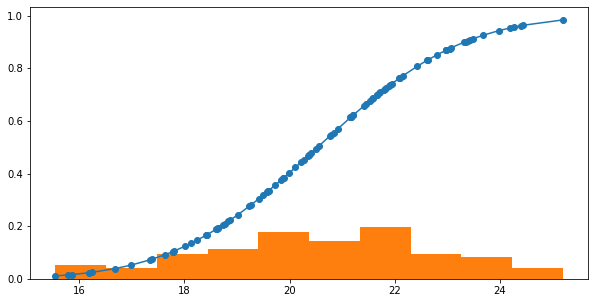

In [42]:
plt.figure(figsize=(10,5))
fit = stats.norm.cdf(h, np.mean(h), np.std(h))
plt.plot(h, fit, '-o')
plt.hist(h, density=True)